In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from tqdm import tqdm_notebook

# Read the image

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt #importing matplotlib
img=cv2.imread("StegoDataset\StegoDataset\Lena.tiff",cv2.IMREAD_GRAYSCALE)


# Display the image

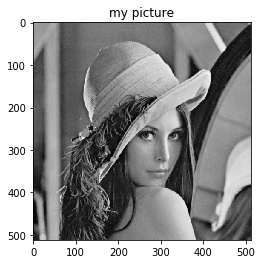

In [4]:
plt.imshow(img,cmap = plt.cm.gray)
plt.title('my picture')
plt.show()


Function parse_text(file_path) to encode the contents of the text file into list of ascii code characters

In [5]:
def parse_text(path):
    with open(path,'r') as fh:
        text=fh.read()
    
    length_of_data=len(text)
    encoded_data=[]
    
    for char in text:
        encoded_data.append(ord(char))
        
        
    return encoded_data

Store the ascii code values of text file in **encoded_data** variable

In [6]:
encoded_data=parse_text("StegoDataset\StegoDataset\Text.txt")

Function **num2bin(number,levels=8)** to convert number to binary list of size *levels*

In [7]:
def num2bin(num,levels=8):
    li=levels*[0]
    
    strg_num=bin(num)[2:]+""
    strg_num=strg_num[::-1]
    
    for indx,i in enumerate(strg_num):
        if i==str(1):        
            li[levels-indx-1]=1
            
    return li

Function **bin2num(number,levels=8)** to convert binary list of size *levels* to  decimal number

In [8]:
def bin2num(binlist,levels=8):
    
    binlist=binlist[::-1]
    
    num=0
    for i in range(levels):
        num+=(binlist[i]*(2**i))
    return num

# Main Method for encryption

In [9]:
def stegano(img_org,encoded_data,levels=8,degree=1,req_rows=0,req_cols=0):
    
    img=img_org.copy()
    ## make a copy to avoid changes to original image
    
    
    
    rows,cols=img.shape
    
    
    
    if len(encoded_data*levels)> rows*cols:
        print("Size exception")
        return 
    
    # If number of characters * 8 > dimensions of image, we can't store it
    
    
    text_tracker=-1             # Used as pointer to move across the characters
    binlist=[]                  # Whenever this is empty, fetch a character and store its binary list into it.
    
    operations=0
    
    row_bin=num2bin(req_rows,16)
    col_bin=num2bin(req_cols,16)
    
    img[0,0]=bin2num(row_bin[:8])
    img[0,cols-1]=bin2num(row_bin[8:])
    img[0,1]=bin2num(col_bin[:8])
    img[0,cols-2]=bin2num(col_bin[8:])
    
    for row in range(1,rows):
        
        for col in range(cols):
            operations+=1
            
            
            if len(binlist)==0 and text_tracker<len(encoded_data):
                
                text_tracker=text_tracker+1                          # For fetching a new character

                if text_tracker>=len(encoded_data):
                    return img
                
                ascii_code= encoded_data[text_tracker]             # Fetched
                binlist=num2bin(ascii_code)                        # Storing binary list of size *levels* into binlist
            
            
            
            text_bits=[]                  # This stores the binary bits that needs to stored in the pixel as per degree
            
            for k in range(min(degree,len(binlist))):       
            
                text_bits.append(binlist[-1])
                binlist=binlist[:-1]
                
                
            
            pixel_binlist=num2bin(img[row,col])
                        
            for k in range(min(degree,len(text_bits))):
                last_pix=text_bits[k]
                pixel_binlist[levels-1-k]=last_pix
            
                    
                
                
            newpixel_value=bin2num(pixel_binlist)
            img[row,col]=newpixel_value
            
    
    print(text_tracker)
                
            
    return img
            

In [10]:
def load_targimage(path):
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    rows,cols=img.shape
    data=img.flatten().tolist()
    return data,rows,cols

In [11]:
encoded_data,req_rows,req_cols=load_targimage('StegoDataset\StegoDataset\F16.tiff')

In [12]:
new_img=stegano(img,encoded_data,levels=8,degree=2,req_rows=req_rows,req_cols=req_cols)

In [13]:
new_img

array([[  0,   0, 162, ..., 170, 152, 124],
       [161, 160, 160, ..., 170, 154, 130],
       [163, 162, 162, ..., 169, 153, 130],
       ..., 
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [14]:
img

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ..., 
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [15]:
# cv2.imwrite('encoded_Lena.tiff',new_img)

In [16]:
print(new_img[0][:8])
test=new_img[0][:8].tolist()
for num in test:
    li=num2bin(num,levels=8)
    print(li)

[  0   0 162 161 162 157 163 161]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 1, 1, 0, 1]
[1, 0, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 0, 0, 0, 0, 1]


In [17]:
img[0][:8]

array([162, 162, 162, 161, 162, 157, 163, 161], dtype=uint8)

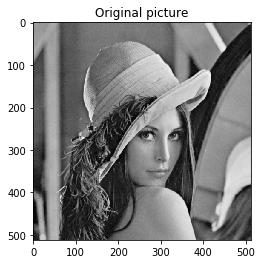

In [18]:
plt.imshow(img,cmap = plt.cm.gray)
plt.title('Original picture')
plt.show()


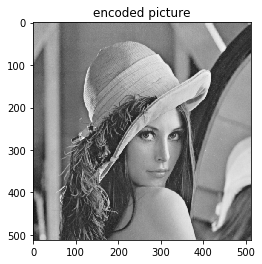

In [19]:
plt.imshow(new_img,cmap = plt.cm.gray)
plt.title('encoded picture')
plt.show()


In [20]:
def reverse_stegano(img_enc,desired_size,levels=8,degree=1):
    
    img=img_enc.copy()
    
    rows,cols=img.shape
    
    if desired_size*levels> rows*cols:
        print("Size exception")
        return 
    
    text_tracker=desired_size-1
    binlist=[]
    
    required_text=''
    
    req_data=[]
    
    req_rows=bin2num(num2bin(img[0][0])+num2bin(img[0][-1]))
    req_cols=bin2num(num2bin(img[0][1])+num2bin(img[0][-2]))
    
    
    
    for row in range(1,rows):
        
        for col in range(cols):

            if len(binlist)>=levels and text_tracker>=0:
                text_tracker=text_tracker-1      
                
                
                req_data.append(bin2num(binlist[::-1]))
                ascii_code= chr(bin2num(binlist[::-1]))
                required_text+=ascii_code
                binlist=binlist[levels:]
                
            if text_tracker<0:

                print(required_text)
                return img,req_data,req_rows,req_cols
            
            

            pixel_binlist=num2bin(img[row,col])
            
        
            for k in range(min(degree,len(pixel_binlist))):
                binlist.append(pixel_binlist.pop())
                
                

In [21]:
_,enc_data,req_roes,req_cos=reverse_stegano(new_img,len(encoded_data),levels=8,degree=2)

A¹¿ÈÇÉÄº­¤§¦¦©ª ¡¦¡¤¬²§¯­ªª¨£¤¡£§¨§®¯«©§¥©¯°®©¦º²µ·±««°¤«­®¬ª¦­©ª§¦¥°°¹µ¹ÂÁ³²µµ¸®½¥¤³Æ¾¦  ©¢©°¢©ª«½ÃÈÉÅÆÍÌÌÊÇ®ª¶±´¨¦¨7¼··½¿¿ÀÀ¾½¾Ã¾ÂÄ¾ÅÀÄÊÄÇÇÉÉÆÅÃÇÁÀ½À¿ÃÅÅÅ½ËÅÈÆÅÅÉÆÀÅÁÅÃÂÁ¾¿¸¿¾À¿¸·º¼½°µ²¶»µ³§¥£¶¶¨¤¡¥¤ z{wloqzwswmyty{}rpvy|vyz~ØØÍÑÛÛÙÖØÙÙÖÒÛ¥T«¡¢ ½»¸·¹¼¹¿ÀÇÅÆÇÇÁÈÃÅÅÈÁÄÊÆÈÇÈÂÇÍÏÐÎÇÅÉËÍËÇÌÉÊÉÊÃÈÇÆÍÊËÄËÊÉÊÉÄÆ¼Â¼º¿º½»²·´­«¨«³¬µ±®³±·´¸½·¾¹À¸½³½¸°¶wlprnutu}|wqotqp|zyyy~z}t|z¡¨£ÍÈ³§Ã;«¶¸®®²´³¹·»·¼Àµ¯¸»µÅÈÃÅÅÆÆÄÇÅÆÈÈÈÈÅÉÈËÊÍÐÎÌÌÏËËËÊÆÊÈÆÆÇÆËÃÆÇÌÈÇËÇÇÀÈÇÄÁÆËÂÃ¸º¿¶¸½»º´¸µºµ»·®¶µµ¿¾¼¿Â¼¾¾¾»ºº·´¯|uxmuzwjwtportvxrty||{~x~¢1±·³º³±ª®¶§¤§¬ª¬§±³½¿´½»ÄÅÀ¾´½ÆÀÂÅÉÆÊÊÌÅÈÎËÉÒÊÒÅËÌÉÈÊÎÐÎÍÈÆÉÉÈÎÊÄÊÊÈÂÇÄ¾ÇÂÄÃ¿¾ÂÀ½ÀÀÂ¼»¾º¹¹³¼¶¹¯¸¾¼·ÁÁÀ¾¿º½¾¿º¾À·³®¨¢mpwvzsmowx}}yxwyy{{twx|{|{5£²¶¸¬¹¥¨°­°¶»ÇÇº®¶µ©¦³¶°Ç¹ÅÅÂÁÆÄÆ¼¾ÉÉÇËÎÌÍÆÊÏÎÊÍÎÌÏÑÐÏÌÎÍÑÊËÌÈÍÌÍÍÐÍÉÌÊÉÎÌÇÊËÉÎÏÌÊÑÍÊÍËËÊÉÊÅÄÃÅÄÂ»Ä¾¾ÁÄ¾À¼ÀÁÃÃÂÅ½¼¼½º·½¹®³²´¬¢xyssu|ss6­°³´°·«­«°¹·¹ÈÉµ±µ¶±¬´«­ÄºÂÅÆÂÆÈÆÃÅËÊÌÊÇÉÊÇÇÌÎÊÏÍÎÎÎÍÐÉÐËÒËÊÌËÐÌÏÍÐÌÌÏÏÎÏÐÊÌÌËÍÏÎÊÐÉ

In [22]:
len(enc_data)

18848

In [23]:
len(encoded_data)

18848

# Image inference

In [24]:
img_data=np.array(enc_data).reshape(req_roes,req_cos)

In [25]:
img_data

array([[ 65, 185, 191, ..., 166, 168, 148],
       [ 55, 188, 183, ..., 210, 219, 165],
       [ 84, 171, 159, ..., 179, 167, 195],
       ..., 
       [ 91, 203, 203, ..., 120, 133, 212],
       [ 90, 207, 209, ..., 125, 155, 208],
       [ 83, 212, 210, ..., 153, 170, 191]])

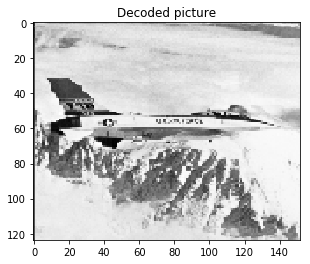

In [26]:
plt.imshow(img_data,cmap = plt.cm.gray)
plt.title('Decoded picture')
plt.show()
